### Develop a function to generate figures - WeatherPy Bonus

In [1]:
#%matplotlib notebook

# Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

#import csv file from weatherpy
csv_file = "city_data.csv"

In [2]:
#read csv file as a dataframe
city_df = pd.read_csv(csv_file, encoding="ISO-8859-1")
city_df.head()

,City Name,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kumluca,36.37,30.29,31.6,41,0,4.04,TR,1594396904
1,Narsaq,60.92,-46.05,9.0,93,75,1.50,GL,1594396907
2,Kapaa,22.08,-159.32,26.0,78,90,7.20,US,1594396909
3,Arraial do Cabo,-22.97,-42.03,23.0,56,75,3.10,BR,1594396912
4,Kajaani,64.23,27.73,13.0,76,100,4.10,FI,1594396913


In [3]:
#convert temperature from celsius to farenheit
#Fahrenheit = (Celsius * 9/5) + 32
#city_df["Max Temp"] = city_df["Max Temp"] * 9/5 + 32
#city_df.head()

In [4]:
#check for cities with humidity >100
too_humid = city_df["Humidity"] > 100
too_humid.value_counts()

False    549
Name: Humidity, dtype: int64

### I used map and lambda functions to convert celsius into farenheit (for practice)

In [5]:
# x should denote the values within a column
city_df["Max Temp"] = city_df["Max Temp"].map(lambda x: (x * 9/5) + 32)
city_df.head()

,City Name,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kumluca,36.37,30.29,88.88,41,0,4.04,TR,1594396904
1,Narsaq,60.92,-46.05,48.20,93,75,1.50,GL,1594396907
2,Kapaa,22.08,-159.32,78.80,78,90,7.20,US,1594396909
3,Arraial do Cabo,-22.97,-42.03,73.40,56,75,3.10,BR,1594396912
4,Kajaani,64.23,27.73,55.40,76,100,4.10,FI,1594396913


In [6]:
# Create a northern hemisphere

northern_hemisphere = city_df.loc[(city_df["Latitude"] >= 0), :]
print(northern_hemisphere.head())
print("-------------------------")
print(len(northern_hemisphere))

  City Name  Latitude  Longitude  Max Temp  Humidity  Cloudiness  Wind Speed  \
0   Kumluca     36.37      30.29     88.88        41           0        4.04   
1    Narsaq     60.92     -46.05     48.20        93          75        1.50   
2     Kapaa     22.08    -159.32     78.80        78          90        7.20   
4   Kajaani     64.23      27.73     55.40        76         100        4.10   
5  ÃrÃ¼mqi     43.80      87.60     80.60        32         100        4.00   

  Country        Date  
0      TR  1594396904  
1      GL  1594396907  
2      US  1594396909  
4      FI  1594396913  
5      CN  1594396916  
-------------------------
373


In [7]:
# Create a southern hemisphere

southern_hemisphere = city_df.loc[(city_df["Latitude"] < 0), :]
print(southern_hemisphere.head())
print("-------------------------")
print(len(southern_hemisphere))

          City Name  Latitude  Longitude  Max Temp  Humidity  Cloudiness  \
3   Arraial do Cabo    -22.97     -42.03    73.400        56          75   
7          Souillac    -20.52      57.52    71.600        64          40   
11          Rikitea    -23.12    -134.97    67.082        65          41   
12      Port Alfred    -33.59      26.89    60.998        90          74   
16         Cidreira    -30.18     -50.21    59.846        70           0   

    Wind Speed Country        Date  
3         3.10      BR  1594396912  
7         9.80      MU  1594396924  
11        8.55      PF  1594396933  
12        7.03      ZA  1594396655  
16        7.38      BR  1594396663  
-------------------------
176


In [8]:
# Build a function for generating figures

# Create a scatter plot function
# def make_scatter(x_variable, y_variable):
#    return plt.scatter(x = x_variable, y = y_variable
#        , marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
    
#make_scatter(northern_hemisphere["Latitude"], northern_hemisphere["Max Temp"])

#plt.grid(True)
#plt.title("Northern Hemisphere: City Latitude vs Max Temperature (7/10/20)")
#plt.xlabel("City Latitude")
#plt.ylabel("Max Temperature (F)")

Text(0, 0.5, 'Max Temperature (F)')

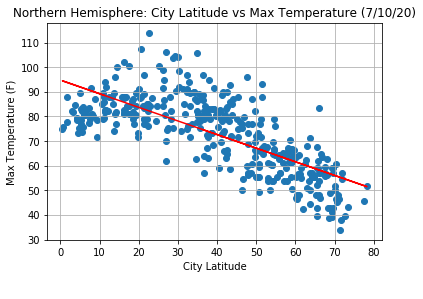

In [12]:
# Create a function to make a scatter plot AND linear regression line
def make_linear_regression(x_variable, y_variable):
    x_values = x_variable
    y_values = y_variable
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(6,10),fontsize=15,color="red")
    plt.grid(True)
        
make_linear_regression(northern_hemisphere["Latitude"], northern_hemisphere["Max Temp"])
plt.title("Northern Hemisphere: City Latitude vs Max Temperature (7/10/20)")
plt.xlabel("City Latitude")
plt.ylabel("Max Temperature (F)")

Text(0, 0.5, 'Max Temperature (F)')

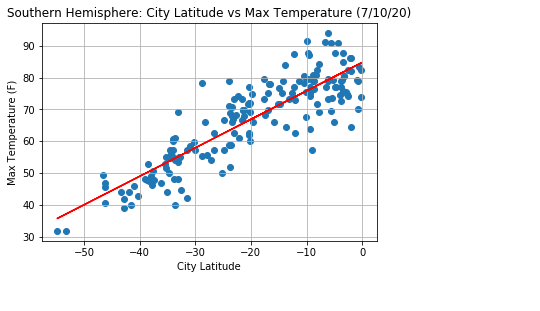

In [10]:
make_linear_regression(southern_hemisphere["Latitude"], southern_hemisphere["Max Temp"])
plt.title("Southern Hemisphere: City Latitude vs Max Temperature (7/10/20)")
plt.xlabel("City Latitude")
plt.ylabel("Max Temperature (F)")

Text(0, 0.5, 'Humidity (%)')

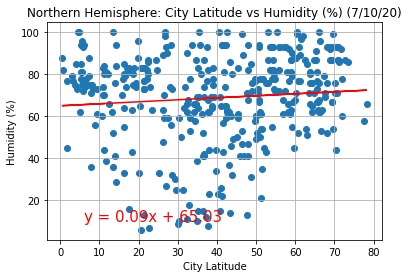

In [13]:
make_linear_regression(northern_hemisphere["Latitude"], northern_hemisphere["Humidity"])
plt.title("Northern Hemisphere: City Latitude vs Humidity (%) (7/10/20)")
plt.xlabel("City Latitude")
plt.ylabel("Humidity (%)")

Text(0, 0.5, 'Humidity (%)')

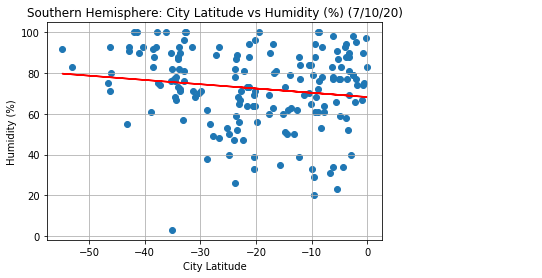

In [14]:
make_linear_regression(southern_hemisphere["Latitude"], southern_hemisphere["Humidity"])
plt.title("Southern Hemisphere: City Latitude vs Humidity (%) (7/10/20)")
plt.xlabel("City Latitude")
plt.ylabel("Humidity (%)")

Text(0, 0.5, 'Cloudiness (%)')

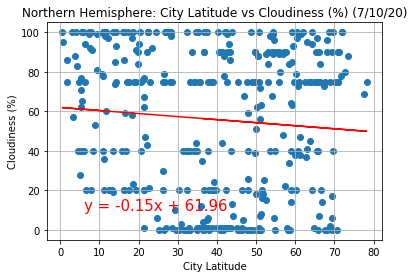

In [15]:
make_linear_regression(northern_hemisphere["Latitude"], northern_hemisphere["Cloudiness"])
plt.title("Northern Hemisphere: City Latitude vs Cloudiness (%) (7/10/20)")
plt.xlabel("City Latitude")
plt.ylabel("Cloudiness (%)")

Text(0, 0.5, 'Cloudiness (%)')

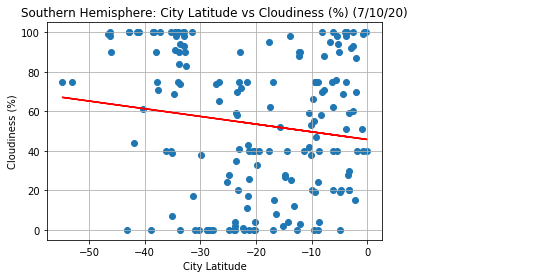

In [17]:
make_linear_regression(southern_hemisphere["Latitude"], southern_hemisphere["Cloudiness"])
plt.title("Southern Hemisphere: City Latitude vs Cloudiness (%) (7/10/20)")
plt.xlabel("City Latitude")
plt.ylabel("Cloudiness (%)")